# 项目：WeRateDogs

## 项目背景

**项目说明：** 将要清洗 (分析和可视化) 的数据集是推特用户 @dog_rates 的档案, 也叫做 WeRateDogs。推特用户 WeRateDogs 以诙谐幽默的方式对人们的宠物狗评级。这些评级通常以 10 作为分母。但是分子呢？分子一般大于 10。 11/10、12/10、13/10 等，为什么呢？因为 "Brent 它们是好狗。" WeRateDogs 拥有四百多万关注者，曾受到国际媒体的报道。

**目标：** 清洗 WeRateDogs 推特数据，创建有趣可靠的分析和可视化。推特档案很大，但是只包括基本的推特信息。对 "Wow!" 进行收集、评估和清洗，是分析和可视化应该做的。

## 项目数据采集

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json

pd.set_option('max_colwidth', 200)  #设置Dataframe里字段最大展示字符数为200

### WeRateDogs 推特档案

In [2]:
# 下载 WeRateDogs 推特档案数据：twitter-archive-enhanced.csv
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/twitter-archive-enhanced.csv'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [3]:
# 将 twitter-archive-enhanced.csv 导入一个 DataFrame 中
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### 推特图片预测数据

In [4]:
# 下载 推特图片预测数据：image-predictions.tsv
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
# 将 推特图片预测数据入一个 DataFrame 中
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

### Twitter API 的附加数据

In [6]:
# 下载 Twitter API 的附加数据：tweet_json.txt
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt'
response = requests.get(url)

with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
# 将 tweet_json.txt 导入一个 DataFrame 中
tweet_json = pd.read_json('tweet_json.txt', lines = True)

## 评估项目数据

### WeRateDogs 推特档案

#### 目测评估

In [8]:
# 查看 WeRateDogs 推特档案数据

twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

**质量问题：**

- 狗狗的名字清洗有问题，有大量狗狗的名字为"None"，甚至部分狗狗名字为"a"、"an"、"the"等
- 部分带特殊字符的狗狗名字清洗错误，如"O'Malley" 被清洗成"O"
- 缺少转发数（retweet_count）和喜欢数（favorite_count）

**格式问题：**

- 狗狗的“地位”评级数据分散多列

#### 编程评估

In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**质量问题：**

- 包含有181条转发数据
- 推特发布时间戳“timestamp”的类型不是时间类型

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


**质量问题：**

- 狗狗的评分，分子清洗有问题，查看"rating_numerator"维度，发现分子最小0分，最大1776分
- 狗狗的评分，分母清洗有问题，查看"rating_denominator"维度，发现分母最小0分，最大170分

In [11]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

**选择部分特殊评分分子进行评估，发现以下问题：**

In [12]:
twitter_archive[twitter_archive.rating_numerator == 27].text

763    This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: text, dtype: object

**质量问题：**
- 狗狗的评分，分子是小数，但是只提取了小数点后面的数字的情况。如11.27/10，错误提取为27/10

In [13]:
twitter_archive[twitter_archive.rating_numerator == 99].text

1228    Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Name: text, dtype: object

**质量问题：**
- 狗狗的评分，包含有多个狗狗的总评分：99/90，规律是：分母是10的N倍，且分子可以被 N 整除

In [14]:
twitter_archive[twitter_archive.rating_numerator == 24].text

516    Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Name: text, dtype: object

**质量问题：**
- 狗狗的评分中，存在比较特殊的错误，比如"24/7"指的是7天24小时，并不是一条评分。

In [15]:
twitter_archive[twitter_archive.rating_numerator == 50].text

1202    This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Name: text, dtype: object

**质量问题：**
- 同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确

In [16]:
twitter_archive[pd.to_datetime(twitter_archive.timestamp) > pd.to_datetime('2017-08-01')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


**质量问题：**

- 包含有 2017 年 8 月 1 日之后的数据（2条）

### 推特图片预测数据

#### 目测评估

In [17]:
#查看推特图片预测数据

image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**质量问题：**
- 狗狗的种类名称不规范，首字母有的大写有的小写

#### 编程评估

In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


**质量问题：** 

- 缺失部分数据（WeRoteDog 推特档案2356条，推特图片预测数据2075条）

### Twitter API 的附加数据

#### 目测评估

In [19]:
tweet_json

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1', u'display_url': u'pic.twitter.com/MgUWQ76dJU', u'url': u'https://t.co/MgUWQ76dJU', u'media_url_htt...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892177421306343426/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892177421306343426/photo/1', u'display_url': u'pic.twitter.com/0Xxu71qeIV', u'url': u'https://t.co/0Xxu71qeIV', u'media_url_htt...",33786,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/891815181378084864/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/891815181378084864/photo/1', u'display_url': u'pic.twitter.com/wUnZnhtVJB', u'url': u'https://t.co/wUnZnhtVJB', u'media_url_htt...",25445,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/891689557279858688/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/891689557279858688/photo/1', u'display_url': u'pic.twitter.com/tD36da7qLQ', u'url': u'https://t.co/tD36da7qLQ', u'media_url_htt...",42863,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
4,NaN,NaN,2017-07-29 16:00:24,"[0,

**质量问题：**

- 推特ID命名不规范（是"id"而不是"tweet_id"）

**格式问题：**
- 三个数据集都是以"tweet_id"为观察对象，应该合并为一个数据集

#### 编程评估

In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

**质量问题：** 

- 包含有177条转发数据（"retweeted_status" 有177条非空记录）

In [21]:
tweet_json[tweet_json.created_at > '2017-08-01']

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892420643555336193/photo/1', u'display_url': u'pic.twitter.com/MgUWQ76dJU', u'url': u'https://t.co/MgUWQ76dJU', u'media_url_htt...",39492,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{u'symbols': [], u'user_mentions': [], u'hashtags': [], u'urls': [], u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892177421306343426/photo/1', u'display_url': u'pic.twitter....","{u'media': [{u'expanded_url': u'https://twitter.com/dog_rates/status/892177421306343426/photo/1', u'display_url': u'pic.twitter.com/0Xxu71qeIV', u'url': u'https://t.co/0Xxu71qeIV', u'media_url_htt...",33786,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{u'follow_request_sent': False, u'has_extended_profile': True, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 4196983835, u'profile_background_image_url_https': u'..."


**质量问题：**

- 包含有 2017 年 8 月 1 日之后的数据（2条）

### 评估总结

#### 质量问题

** WeRoteDog 推特档案：**

- 狗狗的名字清洗有问题，有大量狗狗的名字为"None"，甚至部分狗狗名字为"a"、"an"、"the"等
- 部分带特殊字符的狗狗名字清洗错误，如"O'Malley" 被清洗成"O"
- 缺少转发数（retweet_count）和喜欢数（favorite_count）
- 包含有181条转发数据
- 推特发布时间戳“timestamp”的类型不是时间类型
- 狗狗的评分，分子清洗有问题，查看"rating_numerator"维度，发现分子最小0分，最大1776分
- 狗狗的评分，分母清洗有问题，查看"rating_denominator"维度，发现分母最小0分，最大170分
- 狗狗的评分，分子是小数，但是只提取了小数点后面的数字的情况。如11.27/10，错误提取为27/10
- 狗狗的评分，包含有多个狗狗的总评分：99/90，规律是：分母是10的N倍，且分子可以被 N 整除
- 狗狗的评分，存在比较特殊的错误，比如"24/7"指的是7天24小时，并不是一条评分。
- 同一个推特中存在两处分数形式的数字，提取的是第一个，但是可能第二个才是正确
- 包含有 2017 年 8 月 1 日之后的数据（2条）

** 推特图片预测数据：**

- 狗狗的种类名称不规范，首字母有的大写有的小写
- 缺失部分数据（WeRoteDog 推特档案2356条，推特图片预测数据2075条）

** Twitter API 的附加数据：**

- 推特ID命名不规范（是"id"而不是"tweet_id"）
- 包含有177条转发数据（"retweeted_status" 有177条非空记录）
- 包含有 2017 年 8 月 1 日之后的数据（2条）

#### 格式问题

** WeRoteDog 推特档案：**

- 狗狗的“地位”评级数据分散多列

** Twitter API的附加数据：**

- 三个数据集都是以"tweet_id"为观察对象，应该合并为一个数据集

## 清洗项目数据

In [22]:
twitter_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_json.copy()

### 清洗 Twitter API 的附加数据

#### 删除2017年8月1日之后的数据

In [23]:
# 删除2017年8月1日之后的数据

tweet_clean_1 = tweet_clean[tweet_clean.created_at < '2017-08-01'].copy()

In [24]:
# 验证清洗结果

tweet_clean_1[tweet_clean_1.created_at > '2017-08-01']

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


#### 删除转发的数据

In [25]:
# 删除转发的数据

tweet_clean_2 = tweet_clean_1[tweet_clean_1.retweeted_status.isnull() == True].copy()

In [26]:
# 验证清洗结果

tweet_clean_2[tweet_clean_2.retweeted_status.isnull() == False]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


#### 提取感兴趣的字段【推特档案编号（id）、转发数（retweet count）和喜爱数（favorite count）】

In [27]:
tweet_clean_3 = tweet_clean_2[['id','favorite_count','retweet_count']].copy()

#### 规范列名

In [28]:
# 将"id"修改成"tweet_id"

tweet_clean_3.columns = ['tweet_id','favorite_count','retweet_count']

In [29]:
# 验证清洗结果

tweet_clean_3

,tweet_id,favorite_count,retweet_count
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721
5,891087950875897856,20548,3240
6,890971913173991426,12053,2142
7,890729181411237888,66596,19548
8,890609185150312448,28187,4403
9,890240255349198849,32467,7684
10,890006608113172480,31127,7584
11,889880896479866881,28208,5116


### 清洗 推特图片预测数据

#### 提取图片是狗狗的数据

根据"推特图片预测数据"的描述，选取预测结果第一名（p1），且预测结果为狗的数据（p1_dog = True）

In [30]:
# 提取预测结果为狗的数据（p1_dog = True）

image_p1 = image_clean[image_clean.p1_dog == True].copy()

In [31]:
# 验证清洗结果

image_p1.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

#### 提取感兴趣的字段【推特档案编号（tweet_id）、预测的狗狗种类（p1）】

In [32]:
image_dog = image_p1[['tweet_id','p1']].copy()

#### 统一狗狗种类的命名规范（首字母全部大写）

In [33]:
image_dog['p1'] = image_dog[['p1']].applymap(lambda x: x.title())

In [34]:
# 验证清洗效果

image_dog.p1.value_counts()

Golden_Retriever               150
Labrador_Retriever             100
Pembroke                        89
Chihuahua                       83
Pug                             57
Chow                            44
Samoyed                         43
Toy_Poodle                      39
Pomeranian                      38
Cocker_Spaniel                  30
Malamute                        30
French_Bulldog                  26
Miniature_Pinscher              23
Chesapeake_Bay_Retriever        23
Staffordshire_Bullterrier       20
German_Shepherd                 20
Siberian_Husky                  20
Cardigan                        19
Shetland_Sheepdog               18
Maltese_Dog                     18
Beagle                          18
Eskimo_Dog                      18
Shih-Tzu                        17
Rottweiler                      17
Lakeland_Terrier                17
Kuvasz                          16
Italian_Greyhound               16
West_Highland_White_Terrier     14
Great_Pyrenees      

#### 修改列名

In [35]:
# 修改列名，将"p1"修改成"dog_type"

image_dog.columns = ['tweet_id','dog_type']

In [36]:
# 验证清洗效果

image_dog.head()

,tweet_id,dog_type
0,666020888022790149,Welsh_Springer_Spaniel
1,666029285002620928,Redbone
2,666033412701032449,German_Shepherd
3,666044226329800704,Rhodesian_Ridgeback
4,666049248165822465,Miniature_Pinscher


### 清洗 WeRoteDog 推特档案

#### 修正错误的数据类型（推特发布时间戳“timestamp”的类型不是时间类型）

In [37]:
# 将推特发布时间戳“timestamp”的类型修改成时间类型

twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

In [38]:
# 验证清洗结果

twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### 删除2017年8月1日之后的数据

In [39]:
# 删除2017年8月1日之后的数据

twitter_clean_1 = twitter_clean[twitter_clean.timestamp < '2017-08-01'].copy()

In [40]:
# 验证清洗结果

twitter_clean_1[twitter_clean_1.timestamp > '2017-08-01']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 删除转发的数据

In [41]:
# 删除转发的数据

twitter_clean_2 = twitter_clean_1[twitter_clean_1.retweeted_status_id.isnull() == True].copy()

In [42]:
# 验证清洗结果

twitter_clean_2[twitter_clean_2.retweeted_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 删除不是狗狗的数据

根据已提取的图片是狗狗的“推特图片预测数据”（"image_dog"），来筛选推特档案数据

In [43]:
# 删除不是狗狗的数据（合并推特图片预测数据集）

twitter_dog = pd.merge(twitter_clean_2,image_dog, on = 'tweet_id')

In [44]:
# 验证清洗结果

twitter_dog[twitter_dog.dog_type.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type


#### 重新提取狗狗的名字

In [45]:
# 重新提取狗狗的名字

twitter_dog['new_name'] = twitter_dog.text.str.extract('(?:This is|Meet|name is|Say hello to|named|Here we have)\s([A-Z][^\s.,]*)', expand=False)

In [46]:
# 验证清洗结果

twitter_dog.new_name.value_counts()

Cooper       10
Charlie      10
Oliver        9
Tucker        8
Lucy          8
Daisy         7
Penny         7
Sadie         7
Jax           6
Koda          6
Winston       6
Rusty         5
Leo           5
Bella         5
Stanley       5
Bo            5
Toby          5
Scout         4
Zoey          4
Chester       4
Maggie        4
Finn          4
Dexter        4
Bear          4
Scooter       4
Brody         4
Cassie        4
Gus           4
Lola          4
Reggie        4
             ..
Kenny         1
Arlen         1
Kaiya         1
Tripp         1
Robin         1
Pumpkin       1
Puff          1
Alejandro     1
Cal           1
Pickles       1
Liam          1
DonDon        1
Rufio         1
Noosh         1
Kial          1
Jazzy         1
Rhino         1
Rolf          1
Comet         1
Kawhi         1
Gerald        1
Olaf          1
Bonaparte     1
Jeremy        1
Walker        1
Blue          1
Horace        1
Timber        1
Jett          1
Loomis        1
Name: new_name, Length: 

**查看新提取的狗狗名字，基本解决狗狗的名字清洗问题**

#### 重新提取狗狗的评分

In [47]:
# 提取出的分子是带有小数点的，分母是10的倍数
rating = twitter_dog.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)

# 提取出来的结果是个 dataframe 数据集，有两列，分别命名为分子和分母
rating.columns = ['rating_numerator', 'rating_denominator']

# 用新提取的数据替换掉原有的数据，并修改分子的类型
twitter_dog['rating_numerator'] = rating['rating_numerator'].astype(float)
twitter_dog['rating_denominator'] = rating['rating_denominator'].astype(float)

In [48]:
# 验证分子清洗结果

twitter_dog.rating_numerator.value_counts()

12.00     380
10.00     318
11.00     307
13.00     213
9.00      108
8.00       58
7.00       24
14.00      22
6.00       12
5.00        9
4.00        5
3.00        3
99.00       1
13.50       1
11.27       1
84.00       1
165.00      1
9.75        1
2.00        1
44.00       1
11.26       1
88.00       1
121.00      1
50.00       1
80.00       1
45.00       1
60.00       1
143.00      1
Name: rating_numerator, dtype: int64

In [49]:
# 验证分母清洗结果

twitter_dog.rating_denominator.value_counts()

10.0     1463
50.0        3
80.0        2
130.0       1
150.0       1
110.0       1
40.0        1
90.0        1
20.0        1
70.0        1
Name: rating_denominator, dtype: int64

**针对有多个分数的情况，使用 findall 找出所有 text 中有多个分数的数据，然后将其 index 和 text 打印出来，查看具体是哪种情况，单独处理：**

In [50]:
twitter_dog['rating'] = twitter_dog.text.str.findall('((?:\d+\.)?\d+\/[1-9]+[0]+)')
for index in twitter_dog.index:
    rating = twitter_dog.loc[index,'rating']
    if len(set(rating))>1: # 如果有大于一个不同的匹配值
        print('index: ' + str(index))
        print('text: ' + str(twitter_dog.loc[index,'text']))
        print('rating: ' + str(twitter_dog.loc[index,'rating_numerator'])+ '/' + str(twitter_dog.loc[index,'rating_denominator']))
        print

index: 449
text: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
rating: 12.0/10.0

index: 597
text: This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
rating: 10.0/10.0

index: 701
text: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
rating: 4.0/20.0

index: 729
text: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
rating: 50.0/50.0

index: 742
text: Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE
rating: 10.0/10.0

index: 834
text: This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
rating: 9.0/10.0

index: 907
text: Meet Oliviér. He takes killer selfies. Has a dog of his own. I

从以上推特原文可知：

- index值为449、597、742、935、953、1120、1357
> 多条狗狗分别的评分值，考虑取平均分数来代替本条推特的评分

- index值为701、729、1190、
> 评分值抓取错误，应该选另一个分数作为评分值

- index值为834、907、945、1141、1188、1233、1259、1288、1379、1405、1413
> 评分值抓取正确，不用修改


**编程修正评分分数**

In [51]:
index_list = [449, 597, 742, 935, 953, 1120, 1357, 701, 729, 1190]   # 索引值列表
rating_index = [11.5, 8.5, 9, 7.5, 10.5, 10.5, 8.5, 13, 11, 8]       # 修正评分分数

# 根据索引值进行评分修改

for i in range(len(index_list)):
    twitter_dog.loc[index_list[i],'rating_numerator'] = rating_index[i]
    twitter_dog.loc[index_list[i],'rating_denominator'] = 10.0

**将狗狗的评分统一成分母为10的模式：**

In [52]:
twitter_dog['rating_numerator']  = twitter_dog['rating_numerator'] / twitter_dog['rating_denominator'] * 10

twitter_dog['rating_denominator'] = 10

**删除分子为空的推文**

In [53]:
# 查找分子为空的推文

twitter_dog[twitter_dog['rating_numerator'].isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,new_name,rating
311,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",NaN,10,Sam,None,None,None,None,Golden_Retriever,Sam,[]


In [54]:
# 删除分子为空的推文

twitter_dog.drop(311, inplace = True)

In [55]:
# 验证清洗结果

twitter_dog[twitter_dog['rating_numerator'].isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,new_name,rating


**查看清洗后的评分情况**

In [56]:
# 查看清洗后的分子

twitter_dog.rating_numerator.value_counts()

12.00    381
10.00    315
11.00    313
13.00    214
9.00     110
8.00      59
7.00      24
14.00     22
6.00      12
5.00       7
4.00       4
3.00       3
10.50      2
8.50       2
13.50      1
11.27      1
9.75       1
11.26      1
7.50       1
2.00       1
11.50      1
Name: rating_numerator, dtype: int64

In [57]:
# 查看清洗后的分母

twitter_dog.rating_denominator.value_counts()

10    1475
Name: rating_denominator, dtype: int64

#### 重新提取狗狗的“地位”评级数据

In [58]:
#重建索引，避免后续清洗错误
twitter_dog.reset_index(drop = True, inplace = True)  

# 加了个 .str.lower()，避免提取不到大小写不同的地位评级数据
# 这里将 floofer 地位改为使用 floof 提取，因为有很多其他的写法，比如 floofs floofy floofie 等
twitter_dog['stage'] = twitter_dog.text.str.lower().str.findall('(doggo|pupper|puppo|floof)')

# 对 new_stage 列使用 set 来去重，避免出现推文中重复某一个地位评级数据，但是被提取多次，然后调用匿名函数，使其 join 为字符串
twitter_dog['stage'] = twitter_dog['stage'].apply(lambda x: ','.join(set(x)))

# 替换其中的空值为 np.nan
twitter_dog['stage'].replace('', np.nan, inplace = True)

In [59]:
# 验证清洗结果

twitter_dog.stage.value_counts()

pupper          159
doggo            48
floof            33
puppo            24
pupper,doggo      8
puppo,doggo       2
floof,doggo       1
pupper,floof      1
Name: stage, dtype: int64

#### 提取感兴趣的字段

In [60]:
# 查看字段信息

twitter_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 21 columns):
tweet_id                      1475 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1475 non-null datetime64[ns]
source                        1475 non-null object
text                          1475 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1475 non-null object
rating_numerator              1475 non-null float64
rating_denominator            1475 non-null int64
name                          1475 non-null object
doggo                         1475 non-null object
floofer                       1475 non-null object
pupper                        1475 non-null object
puppo                         1475 non-null object
dog_type                    

In [61]:
twitter_dog_clean = twitter_dog[['tweet_id', 'timestamp', 'dog_type', 'new_name', 'rating_numerator', 'stage']].copy()

#### 修改列名

In [62]:
twitter_dog_clean.columns = ['tweet_id', 'times', 'dog_type', 'name', 'rating', 'stage']

In [63]:
# 查看修改效果

twitter_dog_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 6 columns):
tweet_id    1475 non-null int64
times       1475 non-null datetime64[ns]
dog_type    1475 non-null object
name        1063 non-null object
rating      1475 non-null float64
stage       276 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 69.2+ KB


### 合并清洗后的数据

In [64]:
twitter_archive_master =  pd.merge(twitter_dog_clean,tweet_clean_3, on = 'tweet_id')

In [65]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1475 entries, 0 to 1474
Data columns (total 8 columns):
tweet_id          1475 non-null int64
times             1475 non-null datetime64[ns]
dog_type          1475 non-null object
name              1063 non-null object
rating            1475 non-null float64
stage             276 non-null object
favorite_count    1475 non-null int64
retweet_count     1475 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 103.7+ KB


In [66]:
twitter_archive_master

,tweet_id,times,dog_type,name,rating,stage,favorite_count,retweet_count
0,891815181378084864,2017-07-31 00:18:03,Chihuahua,Archie,12.0,NaN,25445,4301
1,891327558926688256,2017-07-29 16:00:24,Basset,Franklin,12.0,NaN,41016,9721
2,891087950875897856,2017-07-29 00:08:17,Chesapeake_Bay_Retriever,NaN,13.0,NaN,20548,3240
3,890971913173991426,2017-07-28 16:27:12,Appenzeller,Jax,13.0,NaN,12053,2142
4,890729181411237888,2017-07-28 00:22:40,Pomeranian,NaN,13.0,NaN,66596,19548
5,890609185150312448,2017-07-27 16:25:51,Irish_Terrier,Zoey,13.0,NaN,28187,4403
6,890240255349198849,2017-07-26 15:59:51,Pembroke,Cassie,14.0,doggo,32467,7684
7,890006608113172480,2017-07-26 00:31:25,Samoyed,Koda,13.0,NaN,31127,7584
8,889880896479866881,2017-07-25 16:11:53,French_Bulldog,Bruno,13.0,NaN,28208,5116
9,889665388333682689,2017-07-25 01:55:32,Pembroke,NaN,13.0,puppo,38745,8502


### 数据导出

将收集、评估和清理过的主数据集保存到 CSV 文

In [67]:
twitter_archive_master.to_csv('./twitter_archive_master.csv', index = False)

## 主数据集分析

处理过的主数据集共有8个维度变量：
- tweet_id：推特发文编号
- times：推特发文时间
- dog_type：狗狗的种类
- name：狗狗的名字
- rating：狗狗获得的评分
- stages：狗狗获得的“地位”评级
- favorite_count：推特发文获得的喜爱数
- retweet_coun：推特发文获得的转发数

分析不同种类的狗狗获得的评分、喜爱数以及转发数的情况

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 不同种类狗狗的数量统计

#### 不同种类狗狗的数量统计TOP10

In [69]:
twitter_archive_master.dog_type.value_counts()[0:10]

Golden_Retriever      138
Labrador_Retriever     95
Pembroke               88
Chihuahua              78
Pug                    54
Chow                   41
Samoyed                40
Toy_Poodle             38
Pomeranian             38
Malamute               29
Name: dog_type, dtype: int64

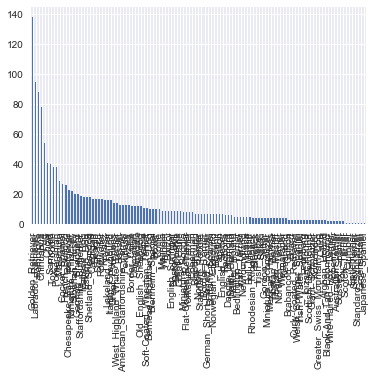

In [70]:
twitter_archive_master.dog_type.value_counts().plot(kind = 'bar')

### 不同种类狗狗的评分分析

#### 参与评分的狗狗，总评分TOP10

In [71]:
twitter_archive_master.groupby('dog_type').sum()[['rating']].sort_values(ascending = False,by = 'rating')[0:10]

,rating
dog_type,
Golden_Retriever,1605.50
Labrador_Retriever,1057.00
Pembroke,1007.00
Chihuahua,831.50
Pug,553.00
Chow,476.00
Samoyed,468.00
Pomeranian,423.75
Toy_Poodle,422.00


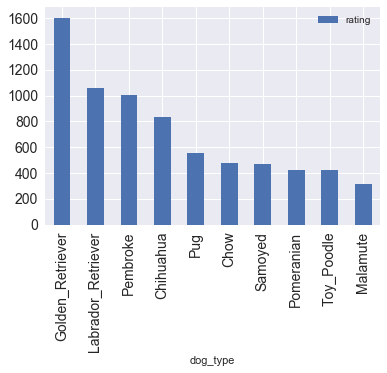

In [72]:
twitter_archive_master.groupby('dog_type').sum()[['rating']].sort_values(ascending = False,by = 'rating')[0:10].plot(kind = 'bar',fontsize = '14')

#### 参与评分的狗狗，评分最高的前10名的种类

In [73]:
# 查看获得最高分的狗狗数量

twitter_archive_master.rating.value_counts()

12.00    381
10.00    315
11.00    313
13.00    214
9.00     110
8.00      59
7.00      24
14.00     22
6.00      12
5.00       7
4.00       4
3.00       3
10.50      2
8.50       2
13.50      1
11.27      1
9.75       1
11.26      1
7.50       1
2.00       1
11.50      1
Name: rating, dtype: int64

In [74]:
# 获得最高分（14分）的狗狗，按种类统计数量并排序

dog_rating_top = twitter_archive_master[twitter_archive_master.rating == 14.0].groupby('dog_type').count().sort_values(ascending = False, by = 'rating')

dog_rating_top

,tweet_id,times,name,rating,stage,favorite_count,retweet_count
dog_type,,,,,,,
Pembroke,4,4,2,4,2,4,4
Golden_Retriever,3,3,1,3,1,3,3
French_Bulldog,2,2,2,2,0,2,2
Bedlington_Terrier,1,1,1,1,1,1,1
Black-And-Tan_Coonhound,1,1,0,1,1,1,1
Bloodhound,1,1,1,1,0,1,1
Chihuahua,1,1,1,1,0,1,1
Eskimo_Dog,1,1,0,1,0,1,1
Gordon_Setter,1,1,0,1,0,1,1


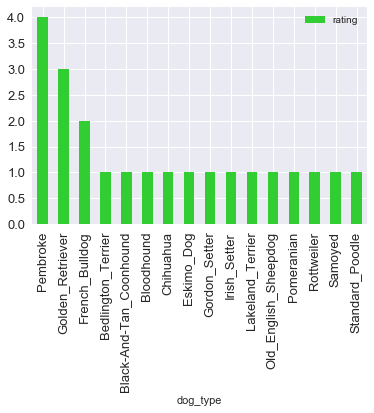

In [75]:
dog_rating_top.plot(kind = 'bar', x = dog_rating_top.index, y = 'rating', fontsize = '13', color = 'limegreen')

#### 参与评分的狗狗，平均评分TOP10

In [76]:
twitter_archive_master.groupby('dog_type').mean()[['rating']].sort_values(ascending = False,by = 'rating')[0:10]

,rating
dog_type,
Saluki,12.500000
Briard,12.333333
Tibetan_Mastiff,12.250000
Border_Terrier,12.142857
Standard_Schnauzer,12.000000
Giant_Schnauzer,12.000000
Silky_Terrier,12.000000
Eskimo_Dog,11.777778
Gordon_Setter,11.750000


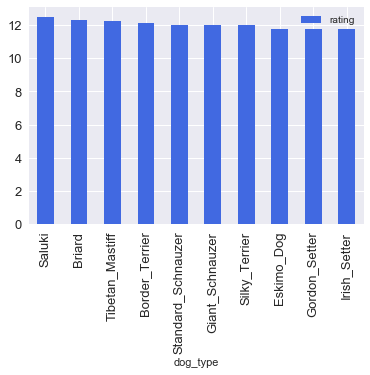

In [77]:
twitter_archive_master.groupby('dog_type').mean()[['rating']].sort_values(ascending = False,by = 'rating')[0:10].plot(kind = 'bar', fontsize = '13', color = 'royalblue')

### 不同种类狗狗的喜爱数分析

#### 不同种类狗狗，总喜欢数TOP10

In [78]:
twitter_archive_master.groupby('dog_type').sum()[['favorite_count']].sort_values(ascending = False, by='favorite_count')[0:10]

,favorite_count
dog_type,
Golden_Retriever,1701430.0
Labrador_Retriever,1119555.0
Pembroke,991762.0
Chihuahua,640201.0
Samoyed,541345.0
French_Bulldog,464224.0
Chow,414190.0
Pug,319099.0
Cocker_Spaniel,314695.0


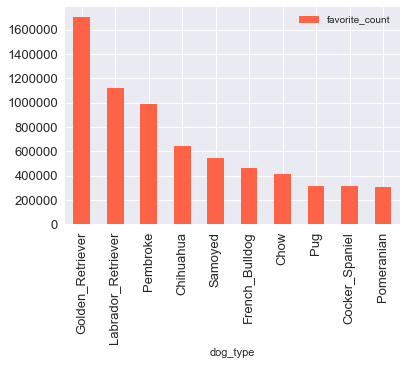

In [79]:
twitter_archive_master.groupby('dog_type').sum()[['favorite_count']].sort_values(ascending = False, by='favorite_count')[0:10].plot(kind = 'bar', fontsize = '13', color = 'tomato')

#### 不同种类狗狗，平均喜爱数TOP10

In [80]:
twitter_archive_master.groupby('dog_type').mean()[['favorite_count']].sort_values(ascending = False, by='favorite_count')[0:10]

,favorite_count
dog_type,
Saluki,23996.250000
French_Bulldog,17854.769231
Afghan_Hound,17250.666667
Black-And-Tan_Coonhound,16952.500000
Flat-Coated_Retriever,16731.625000
Irish_Water_Spaniel,16335.333333
Standard_Poodle,15732.142857
English_Springer,15631.222222
Cardigan,15251.705882


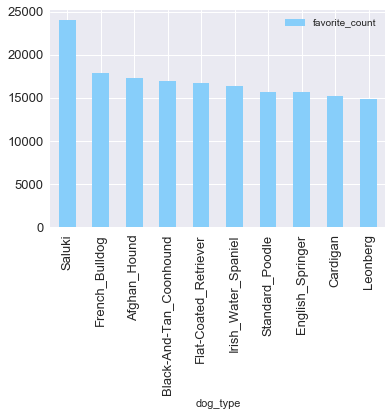

In [81]:
twitter_archive_master.groupby('dog_type').mean()[['favorite_count']].sort_values(ascending = False, by='favorite_count')[0:10].plot(kind = 'bar', fontsize = '13', color = 'lightskyblue')

### 不同种类狗狗的转发数分析

#### 不同种类狗狗，总转发数TOP10

In [82]:
twitter_archive_master.groupby('dog_type').sum()[['retweet_count']].sort_values(ascending = False, by='retweet_count')[0:10]

,retweet_count
dog_type,
Golden_Retriever,503506.0
Labrador_Retriever,364632.0
Pembroke,278975.0
Chihuahua,213041.0
Samoyed,183897.0
French_Bulldog,121066.0
Chow,118926.0
Pomeranian,108798.0
Cocker_Spaniel,100024.0


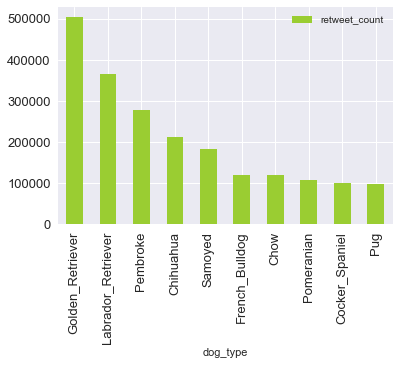

In [83]:
twitter_archive_master.groupby('dog_type').sum()[['retweet_count']].sort_values(ascending = False, by='retweet_count')[0:10].plot(kind = 'bar', fontsize = '13', color = 'yellowgreen')

#### 不同种类狗狗， 平均转发数TOP10

In [84]:
twitter_archive_master.groupby('dog_type').mean()[['retweet_count']].sort_values(ascending = False, by='retweet_count')[0:10]

,retweet_count
dog_type,
Standard_Poodle,6602.142857
English_Springer,5948.666667
Afghan_Hound,5946.000000
Saluki,5103.250000
Eskimo_Dog,4742.444444
Great_Pyrenees,4704.000000
French_Bulldog,4656.384615
Samoyed,4597.425000
Cardigan,4513.647059


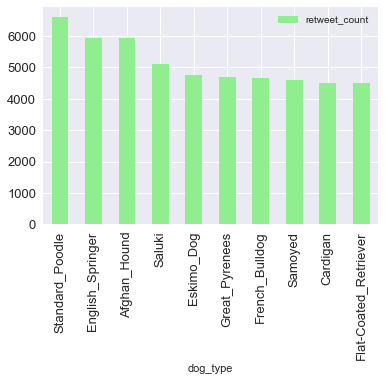

In [85]:
twitter_archive_master.groupby('dog_type').mean()[['retweet_count']].sort_values(ascending = False, by='retweet_count')[0:10].plot(kind = 'bar', fontsize = '13', color = 'lightgreen')